### Note

### Library

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Latex Plot
FontSize = 18
plt.rc('axes',   titlesize = FontSize) # fontsize of the axes title
plt.rc('axes',   labelsize = FontSize) # fontsize of the x and y labels
plt.rc('xtick',  labelsize = FontSize) # fontsize of the tick labels
plt.rc('ytick',  labelsize = FontSize) # fontsize of the tick labels
plt.rc('legend', fontsize  = FontSize) # legend fontsize
plt.rc('figure', titlesize = FontSize) # fontsize of the figure title

matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.size' :  18,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

NameError: name 'matplotlib' is not defined

In [21]:
# reads the FileName and returns a label which identifies the dataset
# label = [filename, day, month, chip, aq_flux, ol_flux, analysis]
def fn_reader(filename):
    
    # return a list of floated values from the text string
    import re
    def get_numbers_from_filename(filename):
        z = re.findall(r'\d+(?:\.\d+)?', filename)
        return [float(z[s]) for s in range(len(z))]
    
    
    chip = 'None'
    if (filename.find('A') != -1): 
        chip = 'A'
    if (filename.find('B') != -1): 
        chip = 'B'
    analysis = 'None'
    if (filename.find('i') != -1): 
        analysis  = 'I'
    if (filename.find('e') != -1): 
        analysis  = 'E'
    date_d = get_numbers_from_filename(filename)[0]
    date_m = get_numbers_from_filename(filename)[1]
    ol     = get_numbers_from_filename(filename)[2]
    aq     = get_numbers_from_filename(filename)[3]
    label  = [filename, date_d, date_m, chip, ol, aq, analysis]
        
    return label

In [22]:
# returns the vector of the mean values of the property "target" indexed by the label
def df_reader(label, target):
    
    target = target.split('[')[0]
    
    values = []

    for i in np.arange(len(label)):        # runs through the files indexed by the label
        df = pd.read_csv(label[i][0])      # dataframe of the i° file
        #print(df)
        indexNamesArr  = df.index.values   # names of the rows of df
        
        for x in indexNamesArr:                  # runs through the rows of each dataframe
            if df.loc[x]['property'].split('[')[0] == target:  # finds the row of the property "target"
                values.append(df.loc[x][1:])     # gets the values of the property
                print(label[i][0] + '\t' + target + '\t YES')
                check = 'true'
        
        # warning: the dataframe has not the "target" property 
        if check == 'false':
            print(label[i][0] + '\t' + target + '\t NO')
            values.append([np.nan, np.nan, np.nan, np.nan])
        
        check  = 'false'
                
    return values



### Importing data

In [23]:
# label = [filename, day, month, chip, aq_flux, ol_flux, analysis]
# label_E for electronic analysis
# label_I for image analysis

import glob, os
os.chdir("./")
label = [];
label_E = []
label_I = []
i = 0
for filename in glob.glob("*.csv"):
    label.append(fn_reader(filename))
    if (label[i][6] == 'E'):
        label_E.append(fn_reader(filename))
    if label[i][6] == 'I':
        label_I.append(fn_reader(filename))
    i = i+1

label_E = np.array(label_E)
label_I = np.array(label_I)

print ('Label_E:\n')
print(label_E)
print ('\n\n Label_I:\n')
print(label_I)

Label_E:

[['2-12_A-ol0.5-aq0.5_e.csv' '2.0' '12.0' 'A' '0.5' '0.5' 'E']
 ['2-12_B-ol10-aq10_e.csv' '2.0' '12.0' 'B' '10.0' '10.0' 'E']
 ['2-12_B-ol15-aq5_e.csv' '2.0' '12.0' 'B' '15.0' '5.0' 'E']
 ['2-12_B-ol2-aq2_e.csv' '2.0' '12.0' 'B' '2.0' '2.0' 'E']
 ['2-12_B-ol3-aq7_e.csv' '2.0' '12.0' 'B' '3.0' '7.0' 'E']
 ['2-12_B-ol30-aq10_e.csv' '2.0' '12.0' 'B' '30.0' '10.0' 'E']
 ['2-12_B-ol5-aq15_e.csv' '2.0' '12.0' 'B' '5.0' '15.0' 'E']
 ['2-12_B-ol5-aq5_e.csv' '2.0' '12.0' 'B' '5.0' '5.0' 'E']
 ['2-12_B-ol7-aq3_e.csv' '2.0' '12.0' 'B' '7.0' '3.0' 'E']]


 Label_I:

[['2-12_A-ol0.5-aq0.5_i.csv' '2.0' '12.0' 'A' '0.5' '0.5' 'I']
 ['2-12_A-ol2-aq2_i.csv' '2.0' '12.0' 'A' '2.0' '2.0' 'I']
 ['2-12_A-ol5-aq5_i.csv' '2.0' '12.0' 'A' '5.0' '5.0' 'I']
 ['2-12_B-ol10-aq10_i.csv' '2.0' '12.0' 'B' '10.0' '10.0' 'I']
 ['2-12_B-ol15-aq5_i.csv' '2.0' '12.0' 'B' '15.0' '5.0' 'I']
 ['2-12_B-ol2-aq2_i.csv' '2.0' '12.0' 'B' '2.0' '2.0' 'I']
 ['2-12_B-ol3-aq7_i.csv' '2.0' '12.0' 'B' '3.0' '7.0' 'I']
 ['2-1

### Data arrangement

In [24]:
# Electronic dataframes -----------------------------------
# temporal distance
E_temp_dist_1 = np.array(df_reader(label_E, 'Temporal distance 1 [s]'))
E_temp_dist_2 = np.array(df_reader(label_E, 'Temporal distance 2 [s]'))
# temporal size
E_temp_size_1 = np.array(df_reader(label_E, 'temporal size 1 [s]'))
E_temp_size_2 = np.array(df_reader(label_E, 'temporal size 2 [s]'))
# temporal period
E_temp_peri_1 = np.array(df_reader(label_E, 'temporal period 1 [s]'))
E_temp_peri_2 = np.array(df_reader(label_E, 'temporal period 2 [s]'))
# dt detectors
E_dt_detectrs = np.array(df_reader(label_E, 'dt detectors [s]'))
# velocity
E_velocities  = np.array(df_reader(label_E, 'velocity [s]'))
# spatial size
E_spat_size_1 = np.array(df_reader(label_E, 'spatial size 1 [s]'))
E_spat_size_2 = np.array(df_reader(label_E, 'spatial size 2 [s]'))
# spatial distance
E_spat_dist_1 = np.array(df_reader(label_E, 'spatial distance 1 [s]'))
E_spat_dist_2 = np.array(df_reader(label_E, 'spatial distance 2 [s]'))
# fiber spatial size
E_fibe_size_1 = np.array(df_reader(label_E, 'fiber spatial size 1 [s]'))
E_fibe_size_2 = np.array(df_reader(label_E, 'fiber spatial size 2 [s]'))

# Image dataframes -----------------------------------------
# distance
I_distance_w = np.array(df_reader(label_I, 'distance w [mm]'))
I_distance_n = np.array(df_reader(label_I, 'distance n [mm]'))
# wavelength
I_wavelength = np.array(df_reader(label_I, 'wavelength [mm]'))
# size
I_size_w     = np.array(df_reader(label_I, 'size w [mm]'))
I_size_n     = np.array(df_reader(label_I, 'size n [mm]'))
# meniscus size
I_meniscus_b = np.array(df_reader(label_I, 'meniscus size b [mm]'))
I_meniscus_f = np.array(df_reader(label_I, 'meniscus size f [mm]'))
# velocity
I_velocity_w = np.array(df_reader(label_I, 'velocity w [mm/s]'))
I_velocity_n = np.array(df_reader(label_I, 'velocity n [mm/s]'))

# fluxes --------------------------------------------------
Flux_aq  = np.array(label_E[:,4]).astype(float)
Flux_ol  = np.array(label_E[:,5]).astype(float)
Flux_tot = Flux_aq + Flux_ol


2-12_A-ol0.5-aq0.5_e.csv	Temporal distance 1 	 YES
2-12_B-ol10-aq10_e.csv	Temporal distance 1 	 YES
2-12_B-ol15-aq5_e.csv	Temporal distance 1 	 YES
2-12_B-ol2-aq2_e.csv	Temporal distance 1 	 YES
2-12_B-ol3-aq7_e.csv	Temporal distance 1 	 YES
2-12_B-ol30-aq10_e.csv	Temporal distance 1 	 YES
2-12_B-ol5-aq15_e.csv	Temporal distance 1 	 YES
2-12_B-ol5-aq5_e.csv	Temporal distance 1 	 YES
2-12_B-ol7-aq3_e.csv	Temporal distance 1 	 YES
2-12_A-ol0.5-aq0.5_e.csv	Temporal distance 2 	 YES
2-12_B-ol10-aq10_e.csv	Temporal distance 2 	 YES
2-12_B-ol15-aq5_e.csv	Temporal distance 2 	 YES
2-12_B-ol2-aq2_e.csv	Temporal distance 2 	 YES
2-12_B-ol3-aq7_e.csv	Temporal distance 2 	 YES
2-12_B-ol30-aq10_e.csv	Temporal distance 2 	 YES
2-12_B-ol5-aq15_e.csv	Temporal distance 2 	 YES
2-12_B-ol5-aq5_e.csv	Temporal distance 2 	 YES
2-12_B-ol7-aq3_e.csv	Temporal distance 2 	 YES
2-12_A-ol0.5-aq0.5_e.csv	temporal size 1 	 YES
2-12_B-ol10-aq10_e.csv	temporal size 1 	 YES
2-12_B-ol15-aq5_e.csv	temporal size 1 	 YE

2-12_B-ol2-aq2_i.csv	velocity w 	 YES
2-12_B-ol3-aq7_i.csv	velocity w 	 YES
2-12_B-ol5-aq15_i.csv	velocity w 	 YES
2-12_B-ol5-aq5_i.csv	velocity w 	 YES
2-12_B-ol7-aq3_i.csv	velocity w 	 YES
2-12_A-ol0.5-aq0.5_i.csv	velocity n 	 YES
2-12_A-ol2-aq2_i.csv	velocity n 	 YES
2-12_A-ol5-aq5_i.csv	velocity n 	 YES
2-12_B-ol10-aq10_i.csv	velocity n 	 YES
2-12_B-ol15-aq5_i.csv	velocity n 	 YES
2-12_B-ol2-aq2_i.csv	velocity n 	 YES
2-12_B-ol3-aq7_i.csv	velocity n 	 YES
2-12_B-ol5-aq15_i.csv	velocity n 	 YES
2-12_B-ol5-aq5_i.csv	velocity n 	 YES
2-12_B-ol7-aq3_i.csv	velocity n 	 YES


### wavelength (period) vs total flux

9 9
[[9.869812440049568 0.12370640920494685 1.8899078971351704
  0.12376194860612595]
 [1.5997515704103482 0.0004212745831292728 0.024856050427773942
  0.00042013401956047337]
 [1.625660613618985 0.001608893687473668 0.026793235937315085
  0.0016089631819898244]
 [nan nan nan nan]
 [4.565799610549139 0.010974408161766999 0.13581593082451
  0.010973826128384]
 [0.8084869912705562 0.001183501750840966 0.025818148848938627
  0.001185998364791765]
 [2.4469651165944266 0.004589128391978409 0.07102361455271257
  0.004589287413612584]
 [3.5245915378627544 0.018070387075445355 0.1933624929982054
  0.021737941056584092]
 [3.2992614733802537 0.015136764520424548 0.09688666770992403
  0.015336005102299462]]


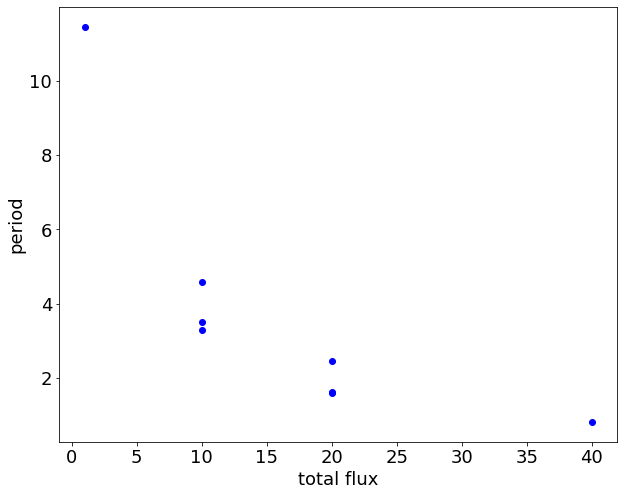

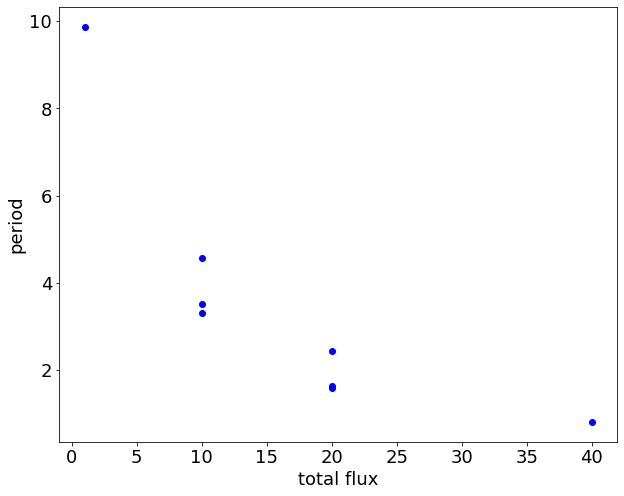

In [32]:

def plotter (X1_data, Y1_data, X2_data,  X_label, Y_label):
    mask_Y = Y_data != np.nan
    mask_X = X_data != np.nan
    mask = mask_X * mask_Y
    fig,ax = plt.subplots(figsize=(10,8))
    ax.scatter(X_data[mask], Y_data[mask], color='blue')
    ax.set_xlabel(X_label)
    ax.set_ylabel(Y_label)
    
print(len(E_temp_peri_1), len(Flux_tot))
print(E_temp_peri_1)

plotter(Flux_tot, E_temp_peri_2[:,0], 'total flux', 'period')
plotter(Flux_tot, E_temp_peri_1[:,0], 'total flux', 'period')

### ratio size/distance vs ratio aq flux/ oil flux

### fiber spatial size

### velocity 

### meniscus size